### Week 2 Problem Set: Graph Theory

In this exercise we will work with real data from the C. Elegans nervous system, using data shared by the [WormAtlas](http://www.wormatlas.org/) database.  We will treat it as an undirected connectome for the purposes of this exercise.

For some problems you will be provided with skeleton code - fill in the lines marked ```...``` with appropriate code to solve problem.

In [1]:
import pandas,numpy
import os,sys
import networkx as nx
import matplotlib.pyplot as plt
import scipy.stats

from brainnetworks.utils import mk_random_graph

%matplotlib inline

# read the data from Wormatlas.org: see section 2.1 of http://www.wormatlas.org/neuronalwiring.html for details

celegans_connectome=pandas.read_excel('http://www.wormatlas.org/images/NeuronConnect.xls')

# set up the graph
Gd = nx.DiGraph()
for i in celegans_connectome.index:
    Gd.add_edge(celegans_connectome.loc[i]['Neuron 1'],celegans_connectome.loc[i]['Neuron 2'])
    
Gu=Gd.to_undirected()

# the graph has two connected components, so we will just keep the giant component
components=nx.connected_component_subgraphs(Gu)
G=next(components)
print(Gu.number_of_nodes())
print(G.number_of_nodes())

283
281


### Problem 1:

a. Plot a histogram of the degree distribution, and print out the mean and maximum degree


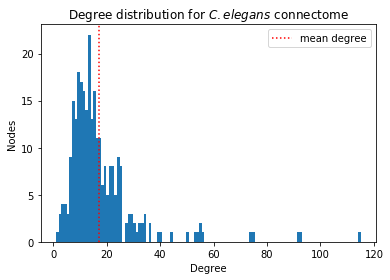

Mean degree is 17.117438. Maximum degree is 115.


In [2]:
degree_distribution = [G.degree(n) for n in G.nodes()]
plt.hist(degree_distribution, 
         bins=115);
plt.ylabel('Nodes');
plt.xlabel('Degree');
plt.axvline(x=numpy.mean(degree_distribution), 
            color='#FF0000', 
            linestyle='dotted', 
            label='mean degree');
plt.legend();
plt.title('Degree distribution for $C. elegans$ connectome');
plt.show();
print('Mean degree is %f. Maximum degree is %d.' 
      % (numpy.mean(degree_distribution),
         numpy.max(degree_distribution)))

b. Compute the average clustering coefficient for the connectome

In [3]:
ce_clustering = nx.average_clustering(G)
print(ce_clustering)

0.34604428028046025


c. Compute the average path length for the connectome

In [4]:
ce_avgpathlength = nx.average_shortest_path_length(G)
print(ce_avgpathlength)

2.324377224199288


#### Problem 2

First, use the provided code to create 100 random graphs with the same size as the C. Elegans connectome. For each graph, we compute its average clustering, average shortest path length, and maximum degree, and store those to a numpy array. (This may take a few minutes to run.)

In [ ]:
# PROVIDED CODE
nruns=100
measures=['clustering','avgpathlength','maxdegree']
results=pandas.DataFrame(numpy.zeros((nruns,len(measures))),
                        columns=measures)

for i in range(nruns):
    G_rand = mk_random_graph(G)
    results.iloc[i]['clustering']=nx.average_clustering(G_rand)
    results.iloc[i]['avgpathlength']=nx.average_shortest_path_length(G_rand)
    results.iloc[i]['maxdegree']=numpy.max([G_rand.degree[i] for i in G_rand.nodes])
    

a.  Compute the tail probability of the observed values of cluster and path length for the C. elegans network, in comparison to the random network results.  That is, what is the probability of a value as or more extreme than the observed value within the random graph distribution? You may find the function ```scipy.stats.percentileofscore()``` useful for this purpose.

In [ ]:
### PROVIDED CODE: 

p_clustering = (100 -  scipy.stats.percentileofscore(results['clustering'], ce_clustering))/100
print('Clustering coefficient','\tObserved:',ce_clustering,'\tRandom:',results['clustering'].mean(),'\tP =',p_clustering)

p_avgpathlength = (100 - scipy.stats.percentileofscore(results['avgpathlength'], ce_avgpathlength))/100
print('Average path length','\tObserved:',ce_avgpathlength,'\tRandom:',results['avgpathlength'].mean(),'\tP =',p_avgpathlength)

p_maxdegree = (100 - scipy.stats.percentileofscore(results['maxdegree'], numpy.max(degree_distribution)))/100
print('Maximum degree','\t\tObserved:',numpy.max(degree_distribution),'\t\t\tRandom:',results['maxdegree'].mean(),'\t\t\tP =',p_maxdegree)


Based on the results of this analysis, do you think that the C. Elegans connectome is a "small world" network"? explain your answer.

**ANSWER**:

Yes, the _C. elegans_ connectome is a small-world network. Small-world networks are characterised by:
- A characteristic path length that is short relative to that of a lattice and comparable to (but longer than) that of a random graph
- A clustering coefficient that is large relative to a random graph and comparable to (but lower than) that of a lattice.

In the above simulation, neither the average path length nor the clustering coefficient of the connectome is matched by any of the randomly generated graphs of similar density. However, the difference in average path length is fractional, whereas the difference in clustering coefficient is almost an order of magnitude. Accordingly, it can be argued that the connectome has an average path length of comparable magnitude to the random graph and a clustering coefficient that is substantially greater.

### Problem 3:

Determine which neuron is the most important based on these four criteria:

- degree centrality
- betweenness centrality
- closeness centrality
- eigenvector centrality

Because networkx returns a dictionary when it computes centrality measures, we have provided a utility function to return the entry with the largest value.

In [ ]:
### PROVIDED CODE

def get_max_from_dict(d):
    """
    return the dict entry with the max value
    after https://stackoverflow.com/questions/268272/getting-key-with-maximum-value-in-dictionary
    """
    return max(d, key=lambda key: d[key])

central_nodes={}
# compute degree centrality
central_nodes['degree']=get_max_from_dict(nx.degree_centrality(G))
# compute eigenvector centrality
central_nodes['eigenvector']=get_max_from_dict(nx.eigenvector_centrality(G))
# compute betweenness centrality
central_nodes['betweenness']=get_max_from_dict(nx.betweenness_centrality(G))
# compute closeness centrality
central_nodes['closeness']=get_max_from_dict(nx.closeness_centrality(G))

print(central_nodes)

You should see that the most central node differs between the different measures.  Given what you know about those measures, explain why this might be the case.

**ANSWER**:

Different formulations of centrality represent different ways of estimating the importance of nodes in a network. Centrality formulations can be categorised as either:
- Medial: node importance is assigned on the basis of paths along which the node lies, as is the case for betweenness centrality
- Radial: node importance is assigned on the basis of a node's being at the end of a path, as is the case for degree, closeness, or eigenvector centrality

Centrality formulations can also be categorised as based on either:
- Volume, the number of paths, as is the case for degree, betweenness, and eigenvector centrality
- Length of paths, as is the case for closeness centrality

Degree centrality scores each node on the basis of the total number of direct connections to that node.
Betweenness centrality scores each node on the basis of the total number of shortest node-to-node paths through that node.
Closeness centrality scores each node on the basis of the distance to all other nodes along shortest paths originating at that node.
Eigenvector centrality scores each node on the basis of its connections to other nodes with high eigenvector centrality, or on the basis of the number of infinite walks originating from that node.

**NOTE**:

NMJ, the node that comes up as most central in several measurements, isn't actually a neuron at all. It represents a generic neuromuscular junction (rather than any specific cellular unit), so it's a postsynaptic partner for _all_ motor neurons. (This also illustrates a potential pitfall of modelling the connectome as an undirected graph -- all connections of NMJ are in-edges.)